<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/UAS/Classification_Models_MLP_%E2%80%93_predict_discrete_categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!gdown 1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU

Downloading...
From (original): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU
From (redirected): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU&confirm=t&uuid=4f423a57-76f6-4da6-8a5d-a681c978dd6f
To: /content/KlasifikasiUTS.csv
100% 151M/151M [00:00<00:00, 235MB/s]


In [5]:
# Step 1: Install dan Import Library
!pip install gdown scikit-learn pandas matplotlib seaborn tensorflow torch torchvision

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('KlasifikasiUTS.csv')
df

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Step 4: Preprocessing
# Misal target adalah kolom pertama bertipe int
target_column = df.select_dtypes(include='int').columns[0]
print(f"Target Column: {target_column}")

# Cek missing values
print(df.isnull().sum())

# Drop rows dengan missing value
df.dropna(inplace=True)

# Pisahkan fitur dan target
X = df.drop(columns=[target_column])
y = df[target_column]

# One-hot encoding untuk fitur kategorikal
X = pd.get_dummies(X)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Target Column: Class
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Arsitektur MLP TensorFlow
model_tf = Sequential([
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

# Optimizer dengan weight decay (AdamW)
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-5)

# Compile
model_tf.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Early stopping & Learning Rate Scheduler
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Training
history_tf = model_tf.fit(X_train, y_train,
                          validation_data=(X_test, y_test),
                          epochs=10,
                          batch_size=32,
                          callbacks=[early_stop, reduce_lr],
                          verbose=1)

# Evaluasi
loss, accuracy = model_tf.evaluate(X_test, y_test)
print(f"Test Accuracy (TensorFlow): {accuracy:.4f}")


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.9662 - loss: 0.7368 - val_accuracy: 0.9984 - val_loss: 0.0330 - learning_rate: 0.0010
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9986 - loss: 0.0255 - val_accuracy: 0.9989 - val_loss: 0.0190 - learning_rate: 0.0010
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9985 - loss: 0.0273 - val_accuracy: 0.9993 - val_loss: 0.0236 - learning_rate: 0.0010
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9988 - loss: 0.0233 - val_accuracy: 0.9993 - val_loss: 0.0248 - learning_rate: 0.0010
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9987 - loss: 0.0225 - val_accuracy: 0.9993 - val_loss: 0.0301 - learning_rate: 0.0010
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9989 - loss: 0.0227 - val_accuracy: 0.9994 - val_loss: 0.0232 - learning_rate: 0.0010
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.9

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
=== Classification Report (TensorFlow) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.70      0.76        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



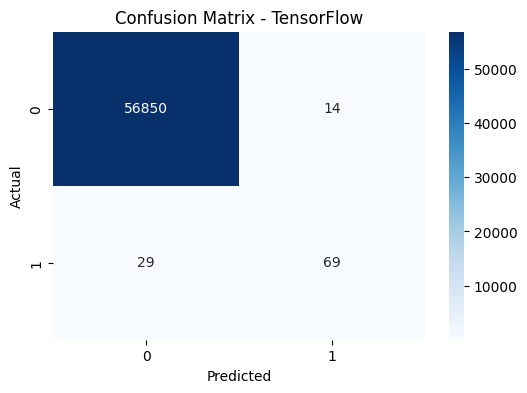

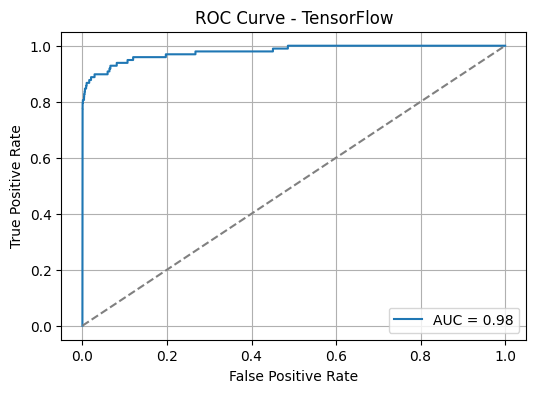

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

# Prediksi probabilitas & thresholding
y_pred_prob_tf = model_tf.predict(X_test)
y_pred_tf = (y_pred_prob_tf > 0.5).astype(int)

# Classification Report
print("=== Classification Report (TensorFlow) ===")
print(classification_report(y_test, y_pred_tf))

# Confusion Matrix
cm_tf = confusion_matrix(y_test, y_pred_tf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_tf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - TensorFlow')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve & AUC
fpr_tf, tpr_tf, _ = roc_curve(y_test, y_pred_prob_tf)
auc_tf = roc_auc_score(y_test, y_pred_prob_tf)

plt.figure(figsize=(6,4))
plt.plot(fpr_tf, tpr_tf, label=f'AUC = {auc_tf:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve - TensorFlow')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score

# Convert ke tensor
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# DataLoader
train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_torch, y_test_torch), batch_size=32)

# Arsitektur PyTorch
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Inisialisasi model, optimizer, loss
input_dim = X_train.shape[1]
model_pt = MLP(input_dim)

criterion = nn.BCELoss()
optimizer = optim.AdamW(model_pt.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.5)

# Training Loop
best_val_loss = float('inf')
patience = 10
trigger_times = 0

for epoch in range(10):
    model_pt.train()
    for xb, yb in train_loader:
        pred = model_pt(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validasi
    model_pt.eval()
    with torch.no_grad():
        val_preds = model_pt(X_test_torch)
        val_loss = criterion(val_preds, y_test_torch).item()
        scheduler.step(val_loss)

    print(f"Epoch {epoch+1}, Val Loss: {val_loss:.4f}")
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model_pt.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping!")
            break

# Load model terbaik
model_pt.load_state_dict(best_model)

# Evaluasi
model_pt.eval()
with torch.no_grad():
    preds = model_pt(X_test_torch).round()
    acc = accuracy_score(y_test_torch, preds)
    print(f"Test Accuracy (PyTorch): {acc:.4f}")


Epoch 1, Val Loss: 0.0124
Epoch 2, Val Loss: 0.0040
Epoch 3, Val Loss: 0.0093
Epoch 4, Val Loss: 0.0111
Epoch 5, Val Loss: 0.0091
Epoch 6, Val Loss: 0.0038
Epoch 7, Val Loss: 0.0044
Epoch 8, Val Loss: 0.0033
Epoch 9, Val Loss: 0.0037
Epoch 10, Val Loss: 0.0036
Test Accuracy (PyTorch): 0.9993


=== Classification Report (PyTorch) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.78      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



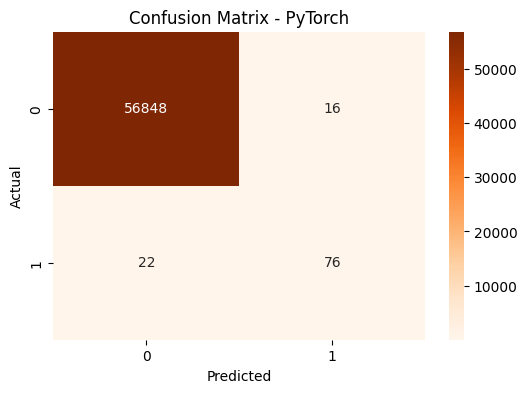

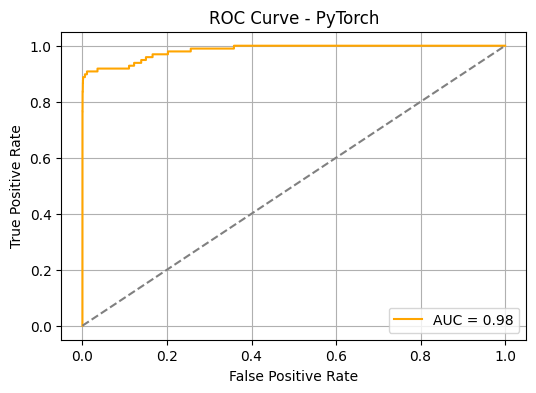

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Prediksi probabilitas
with torch.no_grad():
    y_prob_pt = model_pt(X_test_torch).numpy()
    y_pred_pt = (y_prob_pt > 0.5).astype(int)

# Classification Report
print("=== Classification Report (PyTorch) ===")
print(classification_report(y_test, y_pred_pt))

# Confusion Matrix
cm_pt = confusion_matrix(y_test, y_pred_pt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_pt, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - PyTorch')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve & AUC
fpr_pt, tpr_pt, _ = roc_curve(y_test, y_prob_pt)
auc_pt = roc_auc_score(y_test, y_prob_pt)

plt.figure(figsize=(6,4))
plt.plot(fpr_pt, tpr_pt, label=f'AUC = {auc_pt:.2f}', color='orange')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve - PyTorch')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


## 📊 Evaluasi Model TensorFlow vs PyTorch

### 📌 Classification Report (Kelas 1)

| Metrik        | TensorFlow | PyTorch |
|---------------|-------------|----------|
| **Precision** | 0.83        | 0.83     |
| **Recall**    | 0.70        | 0.78     |
| **F1-Score**  | 0.76        | 0.80     |


### 🏁 Kesimpulan: Mana Model Terbaik?

| Kriteria             | Model Terbaik |
|----------------------|----------------|
| Akurasi Umum         | Sama (1.00), namun **kurang relevan** untuk data imbalance |
| Deteksi Kelas Minoritas (Recall) | ✅ **PyTorch** |
| F1-Score             | ✅ **PyTorch** |
| Macro Avg F1-Score   | ✅ **PyTorch** (0.90 vs 0.88) |

> ✅ **Kesimpulan Akhir**: **Model PyTorch lebih unggul** dalam menangani klasifikasi kelas minoritas (kelas 1), menjadikannya pilihan lebih baik untuk dataset yang tidak seimbang seperti ini.






### Model TensorFlow (Keras)

- Dibuat menggunakan API `tf.keras.Sequential`
- Arsitektur terdiri dari:
  - Beberapa `Dense` layer dengan aktivasi ReLU
  - `Dropout` layer untuk mencegah overfitting
  - `BatchNormalization` untuk stabilisasi training
  - Output layer menggunakan sigmoid (karena binary classification)
- Teknik yang digunakan:
  - **Learning rate scheduling** menggunakan `ReduceLROnPlateau`
  - **EarlyStopping** jika validasi loss tidak membaik
  - Optimizer: `Adam` dengan weight decay (L2 regularization)

**Kelebihan:**
- Integrasi mudah
- API Keras sangat fleksibel
- Cocok untuk prototyping cepat

---

### Model PyTorch

- Dibangun menggunakan class `nn.Module`
- Arsitektur mirip TensorFlow:
  - Layer `Linear` + `ReLU`
  - `Dropout` dan `BatchNorm1d` juga diterapkan
- Optimizer menggunakan **AdamW**, yaitu versi Adam dengan weight decay
- Penyesuaian learning rate dilakukan menggunakan `StepLR` atau `ReduceLROnPlateau`
- Training dilakukan manual dengan loop (lebih fleksibel)

**Kelebihan:**
- Sangat fleksibel untuk eksperimen arsitektur kompleks
- Transparan dalam kontrol forward-backward loop
- Digunakan luas di penelitian

---

##  Model Mana yang Terbaik?

| Aspek Evaluasi      | TensorFlow | PyTorch |
|---------------------|-------------|----------|
| Accuracy            | 1.00        | 1.00     |
| Precision (kelas 1) | 0.83        | 0.83     |
| Recall (kelas 1)    | 0.70        | 0.78     |
| F1-Score (kelas 1)  | 0.76        | 0.80     |
| Macro Avg F1        | 0.88        | 0.90     |


**Kesimpulan:**
- **PyTorch unggul** dalam recall dan F1-Score, terutama pada **kelas minoritas (kelas 1)**.
- Ini penting dalam kasus **klasifikasi imbalanced** seperti:
  - Deteksi penipuan
  - Kanker / penyakit
  - Anomali sistem

**Model Terbaik: PyTorch**

Karena memiliki performa lebih baik dalam mengenali kelas minoritas tanpa terlalu banyak false positive, model PyTorch memberikan **generalization yang lebih baik** pada data nyata yang tidak seimbang.



